In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Turnover_Data.csv")


Overall turnover rate: 16.12%


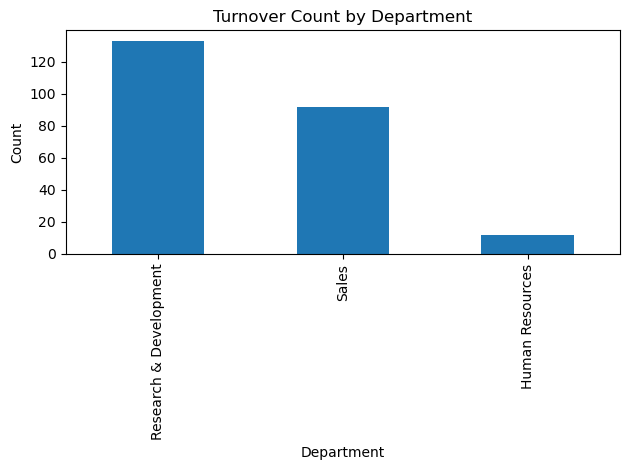

In [3]:
turnover_rate = df['Turnover'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"Overall turnover rate: {turnover_rate:.2f}%")

dept_turnover = df[df['Turnover'] == 'Yes']['Department'].value_counts()

plt.figure()
dept_turnover.plot(kind='bar')
plt.title('Turnover Count by Department')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Share of All Exits by Marital Status:
MaritalStatus
Single      50.6
Married     35.4
Divorced    13.9
Name: proportion, dtype: float64


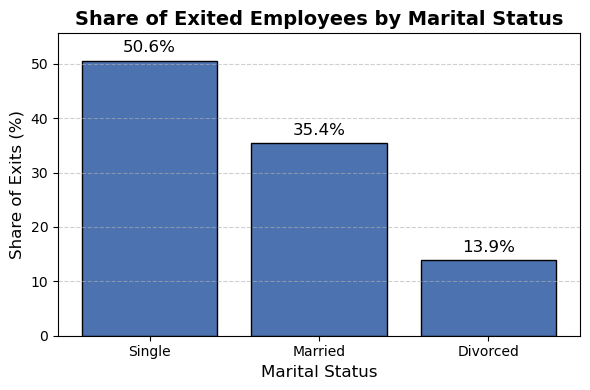

In [62]:


leavers = df[df['Turnover'] == 'Yes'].copy()


marital_share = (
    leavers['MaritalStatus']
      .value_counts(normalize=True)
      * 100
).round(1)

print("Share of All Exits by Marital Status:")
print(marital_share)


plt.figure(figsize=(6,4))
bars = plt.bar(marital_share.index, marital_share.values, color='#4C72B0', edgecolor='black')
plt.title('Share of Exited Employees by Marital Status', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Share of Exits (%)', fontsize=12)
plt.ylim(0, marital_share.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


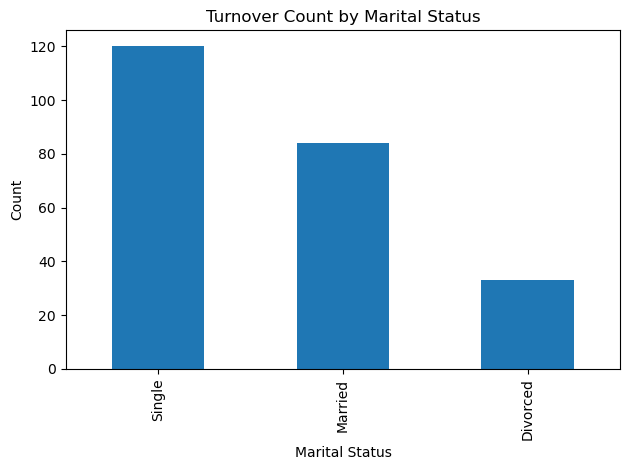

In [4]:

marital_status_turnover = df[df['Turnover'] == 'Yes']['MaritalStatus'].value_counts()

plt.figure()
marital_status_turnover.plot(kind='bar')
plt.title('Turnover Count by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


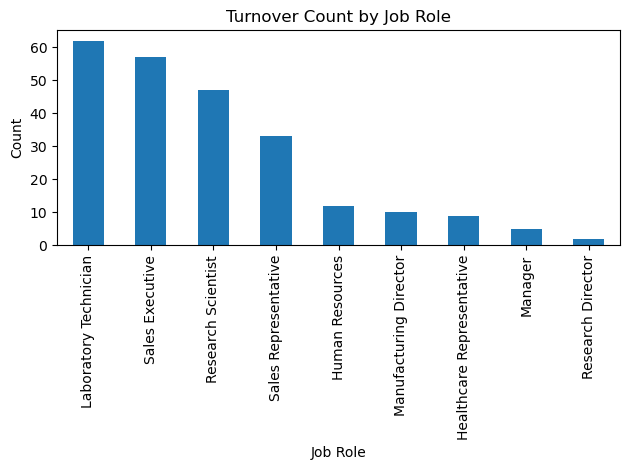

In [64]:

marital_status_turnover = df[df['Turnover'] == 'Yes']['JobRole'].value_counts()

plt.figure()
marital_status_turnover.plot(kind='bar')
plt.title('Turnover Count by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Share of All Exits by Monthly Income Group:
IncomeGroup
1k-3k     47.7
3k-5k     21.1
5k-8k     14.3
8k-12k    12.2
12k+       4.6
Name: proportion, dtype: float64


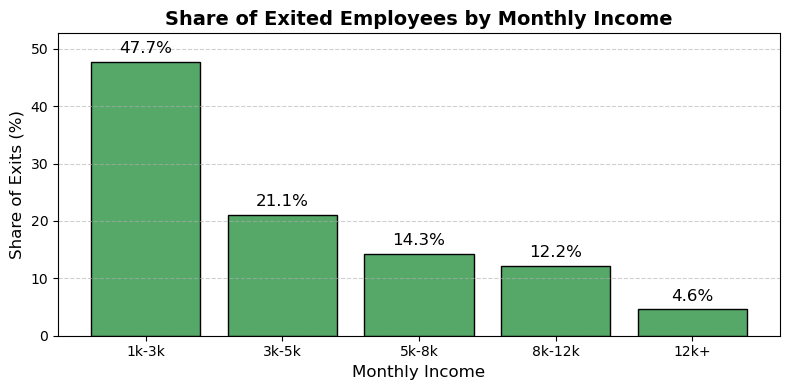

In [61]:
import pandas as pd
import matplotlib.pyplot as plt


leavers = df[df['Turnover'] == 'Yes'].copy()


bins = [1000, 3000, 5000, 8000, 12000, df['MonthlyIncome'].max() + 1]
labels = ['1k-3k', '3k-5k', '5k-8k', '8k-12k', '12k+']
leavers['IncomeGroup'] = pd.cut(
    leavers['MonthlyIncome'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)


income_share = (
    leavers['IncomeGroup']
      .value_counts(normalize=True)
      .reindex(labels)
      * 100
).round(1)


print("Share of All Exits by Monthly Income Group:")
print(income_share)


plt.figure(figsize=(8, 4))
bars = plt.bar(income_share.index, income_share.values, color='#55A868', edgecolor='black')
plt.title('Share of Exited Employees by Monthly Income', fontsize=14, fontweight='bold')
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Share of Exits (%)', fontsize=12)
plt.ylim(0, income_share.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

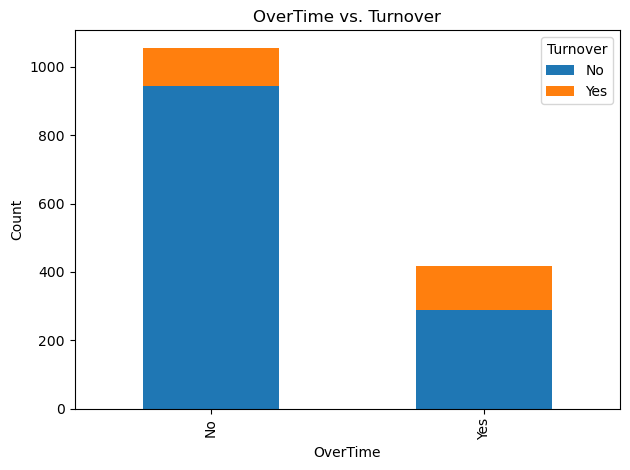

In [16]:

ot_ct = pd.crosstab(df['OverTime'], df['Turnover'])

plt.figure()
ot_ct.plot(kind='bar', stacked=True)
plt.title('OverTime vs. Turnover')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


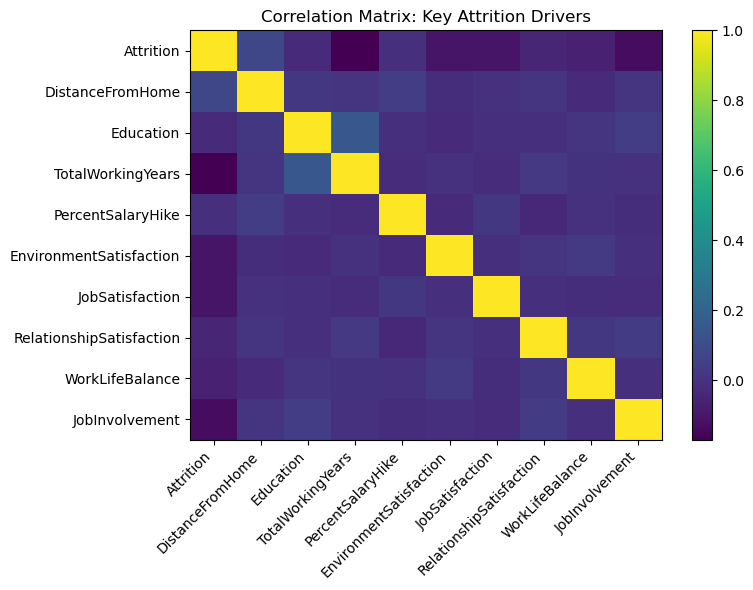

In [6]:
df['Attrition'] = df['Turnover'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

vars_for_corr = [
    'Attrition',
    'DistanceFromHome',
    'Education',
    'TotalWorkingYears',
    'PercentSalaryHike',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'RelationshipSatisfaction',
    'WorkLifeBalance',
    'JobInvolvement'
]
corr = df[vars_for_corr].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(vars_for_corr)), vars_for_corr, rotation=45, ha='right')
plt.yticks(range(len(vars_for_corr)), vars_for_corr)
plt.title('Correlation Matrix: Key Attrition Drivers')
plt.tight_layout()
plt.show()


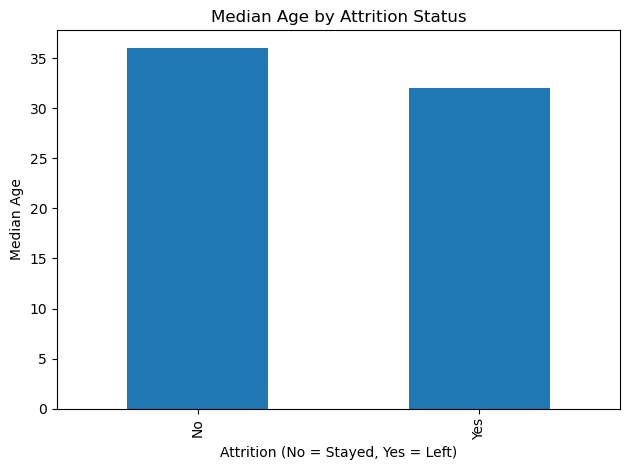

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
median_age = df.groupby('Turnover')['Age'].median()
plt.figure()
median_age.plot(kind='bar')
plt.title('Median Age by Attrition Status')
plt.xlabel('Attrition (No = Stayed, Yes = Left)')
plt.ylabel('Median Age')
plt.tight_layout()
plt.show()


In [60]:
leavers = df[df['Turnover'] == 'Yes']


bins   = [18, 28, 38, 48, 58, 68]
labels = ['18-27', '28-37', '38-47', '48-57', '58-67']
leavers['AgeGroup'] = pd.cut(
    leavers['Age'],
    bins=bins,
    labels=labels,
    right=False
)


age_dist = (
    leavers['AgeGroup']
      .value_counts(normalize=True)
      .reindex(labels)  
      * 100
).round(2)


print("Distribution of Exits by Age Group (% of all leavers):")
print(age_dist)



/var/folders/wk/5fsxkwd93xxfzw5d26n53ns40000gn/T/ipykernel_1702/4237018008.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leavers['AgeGroup'] = pd.cut(


Distribution of Exits by Age Group (% of all leavers):
AgeGroup
18-27    24.89
28-37    47.68
38-47    16.03
48-57     9.28
58-67     2.11
Name: proportion, dtype: float64


Share of All Exits by Commute Distance:
DistGroup
0–5 km      32.5
6–10 km     23.6
11–15 km    13.1
16–20 km    10.1
21+ km      20.7
Name: proportion, dtype: float64


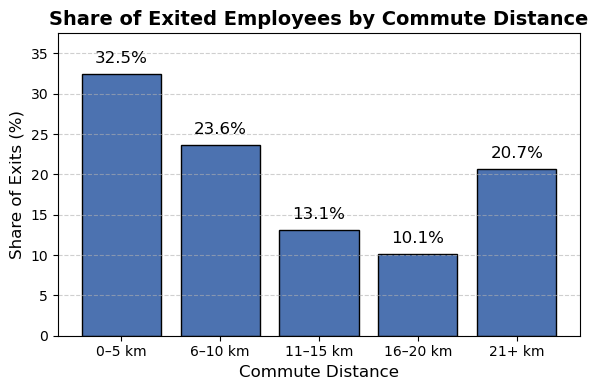

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
leavers = df[df['Turnover'] == 'Yes'].copy()
bins   = [0, 5, 10, 15, 20, leavers['DistanceFromHome'].max() + 1]
labels = ['0–5 km', '6–10 km', '11–15 km', '16–20 km', '21+ km']
leavers['DistGroup'] = pd.cut(
    leavers['DistanceFromHome'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)


dist_share = (
    leavers['DistGroup']
      .value_counts(normalize=True)
      .reindex(labels)  # ensure correct order
      * 100
).round(1)

print("Share of All Exits by Commute Distance:")
print(dist_share)


plt.figure(figsize=(6,4))
bars = plt.bar(dist_share.index, dist_share.values, color='#4C72B0', edgecolor='black')
plt.title('Share of Exited Employees by Commute Distance', fontsize=14, fontweight='bold')
plt.xlabel('Commute Distance', fontsize=12)
plt.ylabel('Share of Exits (%)', fontsize=12)
plt.ylim(0, dist_share.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 1, f'{h:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()



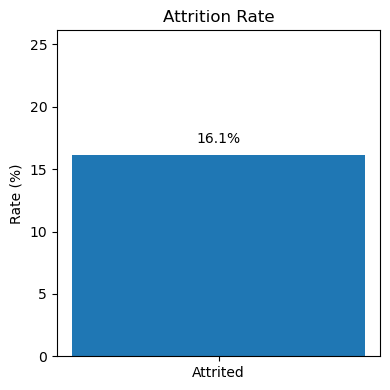

In [12]:
attrited_rate = (df['Turnover'] == 'Yes').mean() * 100


plt.figure(figsize=(4,4))
plt.bar(['Attrited'], [attrited_rate], color='tab:blue')
plt.title('Attrition Rate')
plt.ylabel('Rate (%)')
plt.ylim(0, attrited_rate + 10)
for i, v in enumerate([attrited_rate]):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')
plt.tight_layout()
plt.show()



Average Work–Life Balance:
Stayed    2.781022
Left      2.658228
Name: WorkLifeBalance, dtype: float64


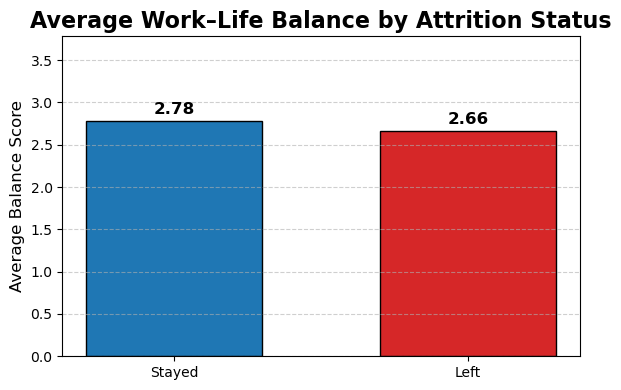

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
avg_wlb = df.groupby('Turnover')['WorkLifeBalance'].mean()
avg_wlb.index = ['Stayed','Left']  

print("Average Work–Life Balance:")
print(avg_wlb)


fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(
    avg_wlb.index,
    avg_wlb.values,
    color=['#1f77b4','#d62728'],
    edgecolor='black',
    width=0.6
)

ax.set_title('Average Work–Life Balance by Attrition Status', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Balance Score', fontsize=12)
ax.set_ylim(0, avg_wlb.max() + 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, h + 0.05,
        f'{h:.2f}', ha='center', va='bottom',
        fontsize=12, fontweight='bold'
    )

plt.tight_layout()
plt.show()


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

df['AttritionFlag'] = (df['Turnover']=='Yes').astype(int)
df['OverTimeFlag']  = (df['OverTime']=='Yes').astype(int)


features = [
    'DistanceFromHome',
    'OverTimeFlag',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'WorkLifeBalance',
    'YearsSinceLastPromotion'
]
X = df[features]
y = df['AttritionFlag']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)


clf = LogisticRegression(penalty='l2', solver='liblinear').fit(X_train_s, y_train)


coefs = pd.Series(clf.coef_[0], index=features)
print("Feature coefficients (higher → greater quit-risk):")
print(coefs.sort_values(ascending=False).round(3))


y_pred = clf.predict(X_test_s)
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=3))

roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_s)[:,1])
print(f"\nTest ROC-AUC: {roc_auc:.3f}")


Feature coefficients (higher → greater quit-risk):
DistanceFromHome           0.185
OverTimeFlag               0.000
YearsSinceLastPromotion   -0.134
WorkLifeBalance           -0.217
EnvironmentSatisfaction   -0.288
JobSatisfaction           -0.292
dtype: float64

Classification report:
              precision    recall  f1-score   support

           0      0.839     1.000     0.912       370
           1      0.000     0.000     0.000        71

    accuracy                          0.839       441
   macro avg      0.420     0.500     0.456       441
weighted avg      0.704     0.839     0.766       441


Test ROC-AUC: 0.611


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


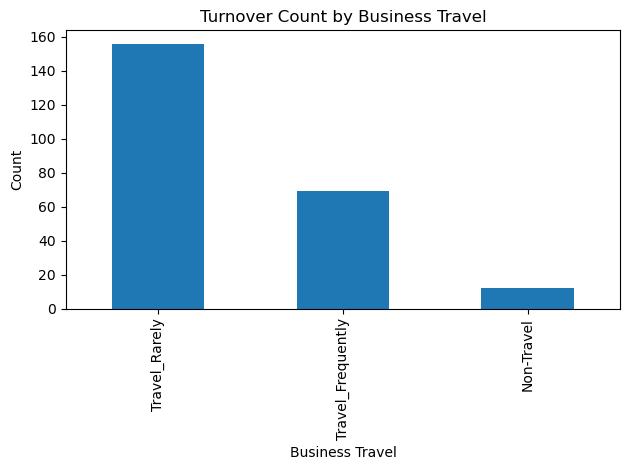

In [41]:

marital_status_turnover = df[df['Turnover'] == 'Yes']['BusinessTravel'].value_counts()

plt.figure()
marital_status_turnover.plot(kind='bar')
plt.title('Turnover Count by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score



df['AttritionFlag'] = (df['Turnover'] == 'Yes').astype(int)
df['OverTimeFlag'] = (df['OverTime'] == 'Yes').astype(int)


df = df.drop(columns=[
    'Turnover','OverTime','EmployeeNumber','EmployeeCount',
    'StandardHours','Over18'
])


df = pd.get_dummies(df, 
    columns=['BusinessTravel','Department','EducationField',
             'Gender','JobRole','MaritalStatus'],
    drop_first=True
)


X = df.drop('AttritionFlag', axis=1)
y = df['AttritionFlag']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_test)
y_proba = rfc.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")


importances = pd.Series(rfc.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)
print("\nTop 10 Predictive Features:")
print(top_features)


Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       370
           1      1.000     1.000     1.000        71

    accuracy                          1.000       441
   macro avg      1.000     1.000     1.000       441
weighted avg      1.000     1.000     1.000       441

Test ROC-AUC: 1.000

Top 10 Predictive Features:
Attrition               0.609512
MonthlyIncome           0.036902
TotalWorkingYears       0.034889
Age                     0.027221
MonthlyRate             0.019718
DailyRate               0.019223
YearsAtCompany          0.018418
YearsWithCurrManager    0.017537
NumCompaniesWorked      0.017217
DistanceFromHome        0.016096
dtype: float64


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Turnover_Data.csv")


In [54]:
print(df.columns.tolist())

['Age', 'Turnover', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Share of All Exits by Age Group:
AgeGroup
18–27    24.9
28–37    47.7
38–47    16.0
48–57     9.3
58+       2.1
Name: proportion, dtype: float64


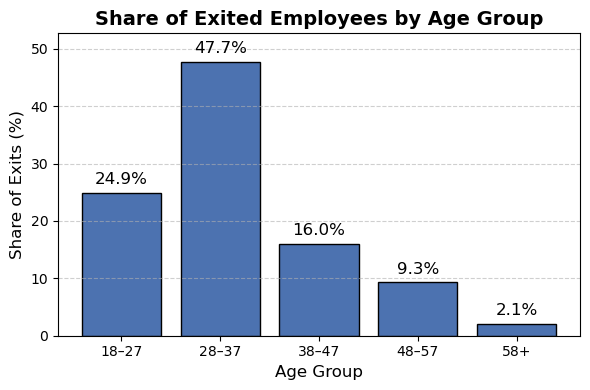

In [65]:
import pandas as pd
import matplotlib.pyplot as plt




leavers = df[df['Turnover'] == 'Yes'].copy()


bins   = [18, 28, 38, 48, 58, leavers['Age'].max() + 1]
labels = ['18–27', '28–37', '38–47', '48–57', '58+']
leavers['AgeGroup'] = pd.cut(
    leavers['Age'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)


age_share = (
    leavers['AgeGroup']
      .value_counts(normalize=True)
      .reindex(labels)  # ensures correct order
      * 100
).round(1)


print("Share of All Exits by Age Group:")
print(age_share)


plt.figure(figsize=(6,4))
bars = plt.bar(age_share.index, age_share.values, color='#4C72B0', edgecolor='black')
plt.title('Share of Exited Employees by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Share of Exits (%)', fontsize=12)
plt.ylim(0, age_share.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)


for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 1,
             f'{h:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


Share of All Exits by Job Role:
JobRole
Laboratory Technician        26.2
Sales Executive              24.1
Research Scientist           19.8
Sales Representative         13.9
Human Resources               5.1
Manufacturing Director        4.2
Healthcare Representative     3.8
Manager                       2.1
Research Director             0.8
Name: proportion, dtype: float64


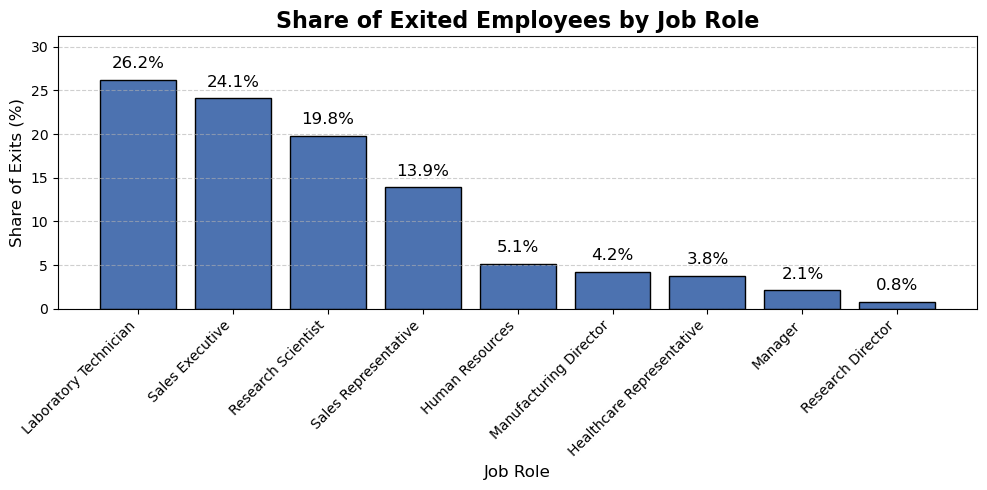

In [66]:
import pandas as pd
import matplotlib.pyplot as plt




leavers = df[df['Turnover'] == 'Yes'].copy()


job_share = (
    leavers['JobRole']
      .value_counts(normalize=True)
      .sort_values(ascending=False)
      * 100
).round(1)


print("Share of All Exits by Job Role:")
print(job_share)


plt.figure(figsize=(10, 5))
bars = plt.bar(job_share.index, job_share.values, color='#4C72B0', edgecolor='black')
plt.title('Share of Exited Employees by Job Role', fontsize=16, fontweight='bold')
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Share of Exits (%)', fontsize=12)
plt.ylim(0, job_share.max() + 5)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()
